In [1]:
import pandas as pd
import time, datetime, tqdm
import matplotlib.pyplot as plt
import numpy as np
import pickle, utils, tools, plots

plt.style.use("style.mplstyle")
path_to_save_plots = "/eos/user/j/jcapotor/DUNE-IFIC/Academic/PhD_Thesis/The Temperature Monitoring System for DUNE and its prototypes at CERN/Contents/PDHD/PDHD_OPERATION/pictures/NORMAL_OPERATION/"

In [2]:
tini, tend = datetime.datetime(2024, 5, 3, 13, 30, 0), datetime.datetime(2024, 11, 29, 23, 0, 0)
data, data_err = utils.load_data(tini, tend)

Text(0.5, 1.0, 'NP04 Temperature Evolution')

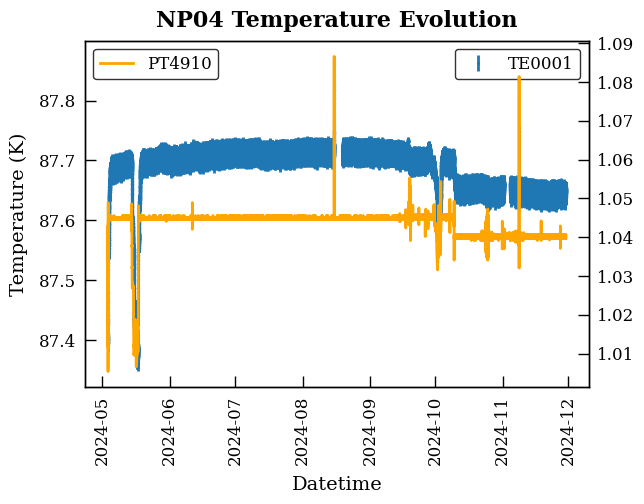

In [3]:
fig, axes = plt.subplots(1, 1)
plots.plot_temp_evolution(
    data=data, data_err=data_err, channel="TE0001",
    tmax=300, tmax_err=1,
    axes=axes
)
#axes.axvline(datetime.datetime(2024, 5, 3, 13, 30, 0), label="Recirculation ON", color="red")
#axes.axvline(datetime.datetime(2024, 12, 3, 14, 30, 0), label="Recirculation ON", color="orange")
axes2 = axes.twinx()
axes2.plot(data.index.to_numpy(), data["PT4910"].to_numpy(), color="orange", label="PT4910")
axes.legend()
axes2.legend()
axes.set_xlabel("Datetime")
axes.set_ylabel("Temperature (K)")
axes.set_title("NP04 Temperature Evolution")
# fig.savefig(f"{path_to_save_plots}np04_temp_evolution_TE0001.png", format="png")

In [2]:
tini, tend = datetime.datetime(2024, 6, 1, 0, 0, 0), datetime.datetime(2024, 7, 1, 0, 0, 0)
data, data_err = utils.load_data(tini, tend)

Text(0.5, 1.0, 'NP04 Temperature Evolution')

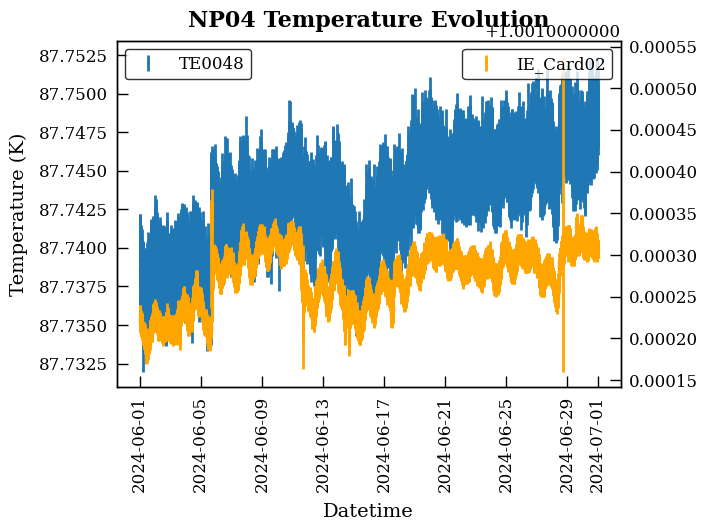

In [5]:
fig, axes = plt.subplots(1, 1)
plots.plot_temp_evolution(
    data=data, data_err=data_err, channel="TE0048",
    tmax=300, tmax_err=1,
    axes=axes
)
#axes.axvline(datetime.datetime(2024, 5, 3, 13, 30, 0), label="Recirculation ON", color="red")
#axes.axvline(datetime.datetime(2024, 12, 3, 14, 30, 0), label="Recirculation ON", color="orange")
axes2 = axes.twinx()
plots.plot_temp_evolution(
    data=data, data_err=data_err, channel="IE_Card02",
    tmax=2, tmin=1, tmax_err=1,
    axes=axes2, color="orange"
)
axes.legend()
axes2.legend()
axes.set_xlabel("Datetime")
axes.set_ylabel("Temperature (K)")
axes.set_title("NP04 Temperature Evolution")
# fig.savefig(f"{path_to_save_plots}np04_temp_evolution_TE0001.png", format="png")

Text(0.5, 1.0, 'Current Correction Performance')

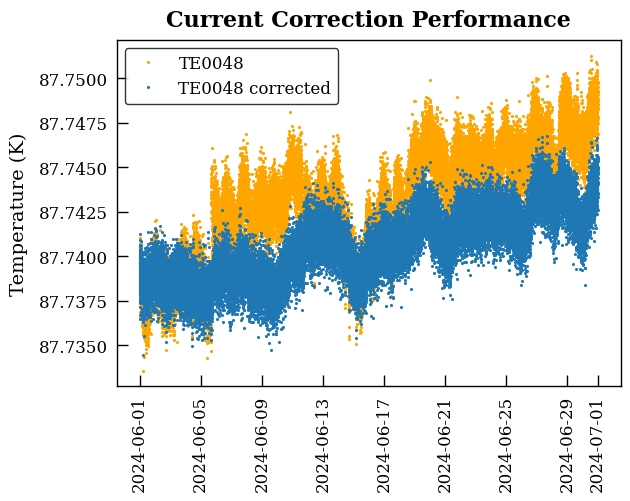

In [6]:
fig, axes = plt.subplots(1,1)
channel = "TE0048"
current_corr = pd.read_csv("/eos/user/j/jcapotor/DUNE-IFIC/Experiments/ProtoDUNE-HD/Operation/Data/2024-7-1_2024-7-6_current_correction.csv", header=0)
current_corr = current_corr.set_index("Unnamed: 0")
correction = current_corr.loc[channel]["slope"]
data_plot = data[channel] - correction * (data[current_corr.loc[channel]["current_channel"]] - data[current_corr.loc[channel]["current_channel"]].iloc[0])


plots.plot_temp_evolution(
    data=data, data_err=None, channel=channel,
    tmax=300, tmax_err=1e-2,
    axes=axes, color="orange"
)
axes.plot(data_plot.loc[(data_plot<87.8)&(data_plot>87.6)].index.to_numpy(),
         data_plot.loc[(data_plot<87.8)&(data_plot>87.6)].to_numpy(), ".",
         label=f"{channel} corrected")
axes.legend()
axes.set_ylabel("Temperature (K)")
axes.set_title("Current Correction Performance")

In [3]:
data_corr, data_corr_err = tools.apply_current_corr(data=data, data_err=data_err)

In [11]:
profile_corr = tools.make_tgrad_profile( data=data_corr, data_err=data_corr_err,
                        date_ini=datetime.datetime(2024, 7, 17, 12, 0, 0), date_end=datetime.datetime(2024, 7, 17, 13, 0, 0),
                        ref="40525", save_path=None
                        )
profile = tools.make_tgrad_profile( data=data, data_err=data_err,
                        date_ini=datetime.datetime(2024, 7, 17, 12, 0, 0), date_end=datetime.datetime(2024, 7, 17, 13, 0, 0),
                        ref="40525", save_path=None
                        )

Profile not saved.
Profile not saved.


/afs/cern.ch/work/j/jcapotor/software/rtd/pdhd/ana/tools.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection_end["CAL-ID"] = selection_end["CAL-ID"].astype(int).astype(str)
/afs/cern.ch/work/j/jcapotor/software/rtd/pdhd/ana/tools.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection_end["CAL-ID"] = selection_end["CAL-ID"].astype(int).astype(str)


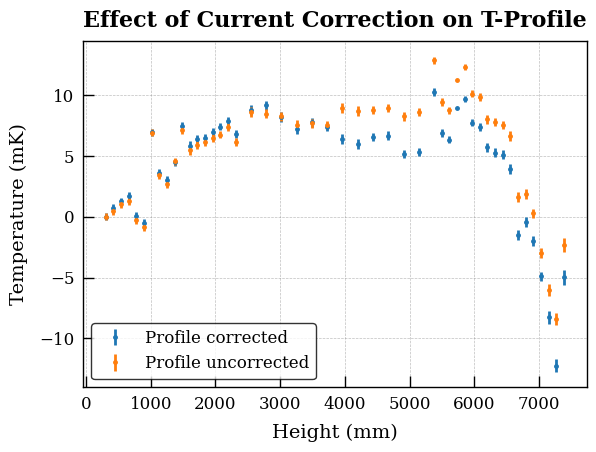

In [12]:
plt.errorbar(profile_corr["Y"].to_numpy(), 1e3*(profile_corr["temp"] - profile_corr.loc["39607"]["temp"]).to_numpy(),
             yerr=1e3*profile_corr["temp_err"].to_numpy(), fmt="o", label="Profile corrected")
plt.errorbar(profile["Y"].to_numpy(), 1e3*(profile["temp"] - profile.loc["39607"]["temp"]).to_numpy(),
              yerr=1e3*profile["temp_err"].to_numpy(), fmt="o", label="Profile uncorrected")
plt.legend(loc="lower left")
plt.title("Effect of Current Correction on T-Profile")
plt.ylabel("Temperature (mK)")
plt.xlabel("Height (mm)")
plt.grid("on")

In [6]:
def load_cfd_sim(path="/eos/user/j/jcapotor/DUNE-IFIC/Experiments/ProtoDUNE-HD/CFD/ProtoDUNE-II Temperature Profiles Pumps Off CE Off.csv"):
    data = pd.read_csv(path, header=0)
    data.columns = ["Y", "temp", "temp_err"]
    data["Y"] = 1000*data["Y"]
    return data

cfd = load_cfd_sim()
cfd = cfd.loc[(cfd["Y"]>300)]

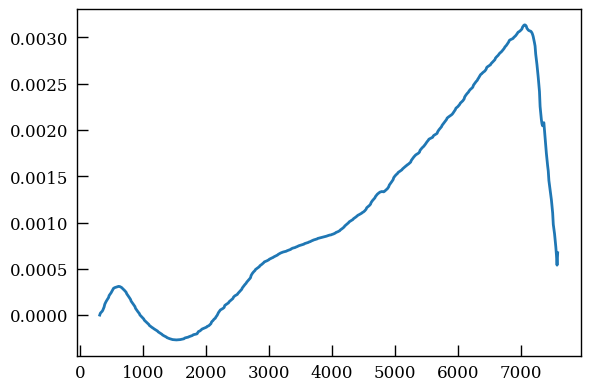

In [7]:
plt.plot(cfd["Y"].to_numpy(), (cfd["temp"]-cfd["temp"].iloc[0]).to_numpy(), label="CFD")

In [2]:
tini, tend = datetime.datetime(2024, 5, 2, 13, 0, 0), datetime.datetime(2024, 5, 2, 14, 0, 0)
data, data_err = utils.load_data(tini, tend)

In [3]:
data_corr, data_corr_err = tools.apply_current_corr(data=data, data_err=data_err)
profile_corr = tools.make_tgrad_profile( data=data_corr, data_err=data_corr_err,
                        ref="40525", save_path=None
                        )
profile = tools.make_tgrad_profile( data=data, data_err=data_err,
                        ref="40525", save_path=None
                        )

Profile not saved.
Profile not saved.


/afs/cern.ch/work/j/jcapotor/software/rtd/pdhd/ana/tools.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['39666' '39665' '39664' '39667' '39661' '39660' '39655' '39654' '39653'
 '39652' '99999' '39651' '39650' '40526' '40525' '40524' '39659' '39658'
 '39657' '39649' '39648' '39647' '39646' '39644' '39630' '39629' '39628'
 '39627' '39626' '39625' '39624' '39623' '39622' '39621' '39620' '39619'
 '40533' '40530' '40531' '40529' '39614' '39613' '39612' '39611' '39610'
 '39609' '39608' '39607']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  selection_end.loc[:, "CAL-ID"] = selection_end["CAL-ID"].astype(int).astype(str)
/afs/cern.ch/work/j/jcapotor/software/rtd/pdhd/ana/tools.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['39666' '39665' '39664' '39667' '39661' '39660' '39655' '39654' '39653'

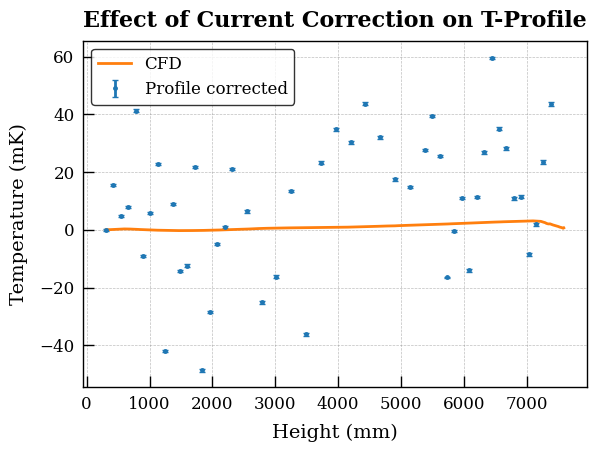

In [8]:
plt.errorbar(profile_corr["Y"].to_numpy(), 1e3*(profile_corr["temp"] - profile_corr.loc["39607"]["temp"]).to_numpy(),
             yerr=1e3*profile_corr["temp_err"].to_numpy(), fmt="o", capsize=2.5, label="Profile corrected")
# plt.errorbar(profile["Y"].to_numpy(), 1e3*(profile["temp"] - profile.loc["39607"]["temp"]).to_numpy(),
#               yerr=1e3*profile["temp_err"].to_numpy(), fmt="o", label="Profile uncorrected")
plt.plot(cfd["Y"].to_numpy(), 1e3*(cfd["temp"]-cfd["temp"].iloc[0]).to_numpy(), label="CFD")
plt.legend(loc="upper left")
plt.title("Effect of Current Correction on T-Profile")
plt.ylabel("Temperature (mK)")
plt.xlabel("Height (mm)")
plt.grid("on")